In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

path = r'C:/Users/ce02971/OneDrive - Allianz/Santiago/Python_Especializacion/Visualizacion de datos'

list_orders = pd.read_csv(path+'\list of Orders.csv', sep=';', header = 0, index_col=False,
                                encoding='latin-1', engine='python')

Order_details = pd.read_csv(path+'\Order Details.csv', sep=',', header = 0, index_col=False,
                                encoding='latin-1', engine='python')

In [2]:
list_orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01/04/2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01/04/2018,Pearl,Maharashtra,Pune
2,B-25603,03/04/2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03/04/2018,Divsha,Rajasthan,Jaipur
4,B-25605,05/04/2018,Kasheen,West Bengal,Kolkata


In [3]:
Order_details

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


## Transformacion de los datos

In [4]:
list_orders['Order Date'] = pd.to_datetime(list_orders['Order Date'], format ="%d/%m/%Y")

In [5]:
# Unir las bases de datos 

df = pd.merge(Order_details, list_orders, 
             left_on= 'Order ID', 
             right_on= 'Order ID')

#df

In [6]:
# Crear las columnas de mes y año

df['Mes'] = df['Order Date'].dt.month
df['Año'] = df['Order Date'].dt.year

df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Mes,Año
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
1,B-25601,66.0,-12.0,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
4,B-25602,168.0,-111.0,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune,4,2018


In [7]:
df_mes = pd.DataFrame(df.groupby(['Mes'])[['Amount', 'Quantity']].sum()).reset_index()
df_mes.head()

,Mes,Amount,Quantity
0,1,61439.0,745
1,2,38424.0,512
2,3,58937.0,751
3,4,32726.0,389
4,5,28545.0,423


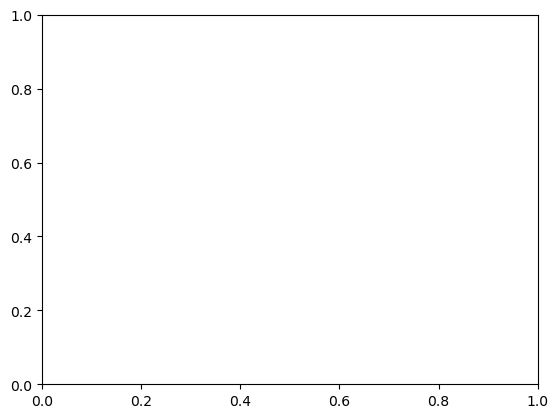

In [8]:
fig, ax = plt.subplots()
plt.show()

## Graficos de tendencias

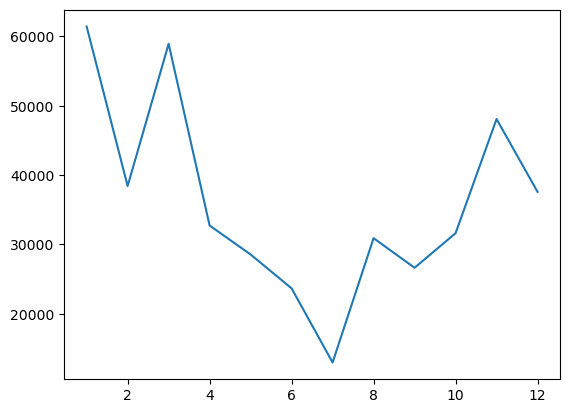

In [9]:
fig, ax = plt.subplots()
ax.plot(df_mes['Mes'], df_mes['Amount'])

plt.show()

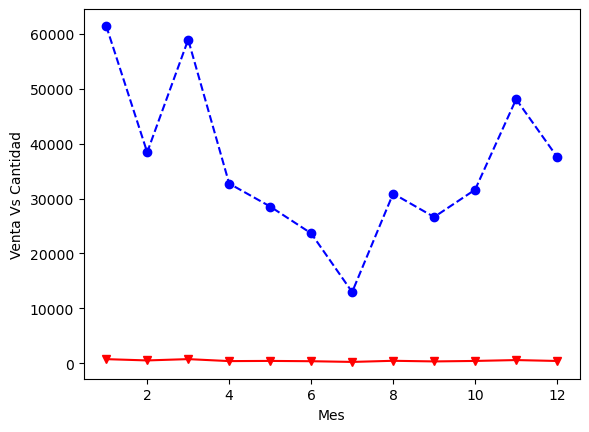

In [10]:
fig, ax = plt.subplots()
ax.plot(df_mes['Mes'], df_mes['Amount'],
       marker='o', linestyle='--', color='b')

ax.plot(df_mes['Mes'], df_mes['Quantity'],
       marker='v', color='r')

ax.set_xlabel('Mes')
ax.set_ylabel('Venta Vs Cantidad')
plt.show()

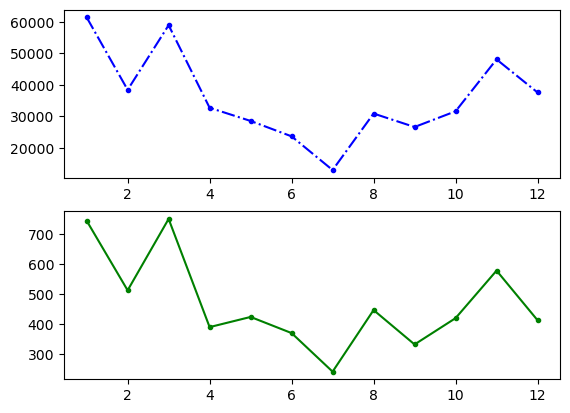

In [11]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(df_mes['Mes'], df_mes['Amount'],
          marker='.', linestyle='-.', color='b')

ax[1].plot(df_mes['Mes'], df_mes['Quantity'],
          marker='.', linestyle= None, color='g')

plt.show()

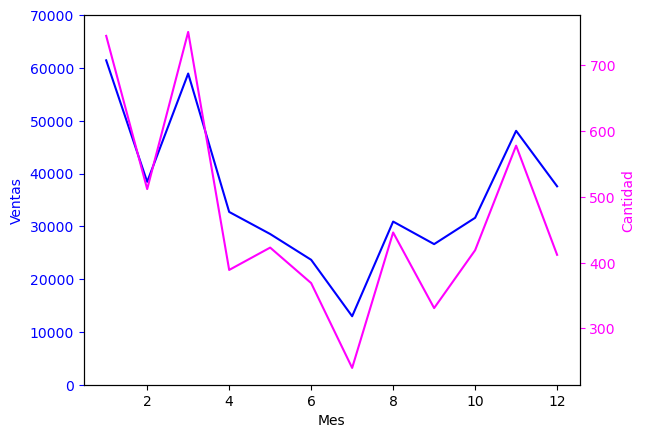

In [12]:
# Graficando 2 ejes con escalas diferentes

fig, ax = plt.subplots()

ax.plot(df_mes['Mes'], df_mes['Amount'], color='blue')
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas', color='blue')
ax.tick_params('y', colors='blue')

ax2=ax.twinx()
ax2.plot(df_mes['Mes'],df_mes['Quantity'], color='magenta')
ax2.set_ylabel('Cantidad', color='magenta')
ax2.tick_params('y', colors='magenta')

ax.set_ylim(0,70000)

plt.show()

## Graficos de barras y dispersion-

In [13]:
#Agrupemos categoria - venta - cantidad

df_categoria= pd.DataFrame(df.groupby(['Category'])[['Amount', 'Quantity']].sum())
df_categoria.head()

,Amount,Quantity
Category,,
Clothing,139054.0,3516
Electronics,165267.0,1154
Furniture,127181.0,945


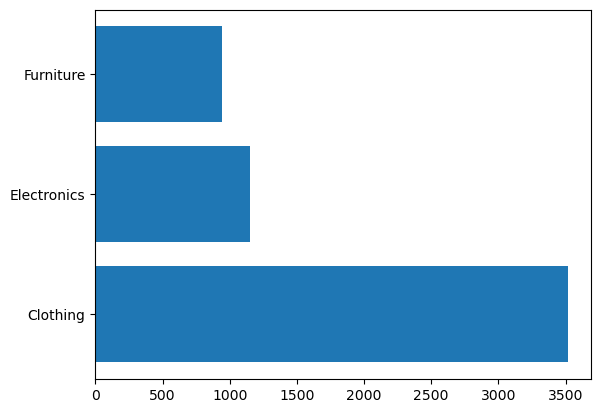

In [14]:
#Graficas de barras horizontales

fig, ax = plt.subplots()

ax.barh(df_categoria.index, df_categoria['Quantity'])

plt.show()

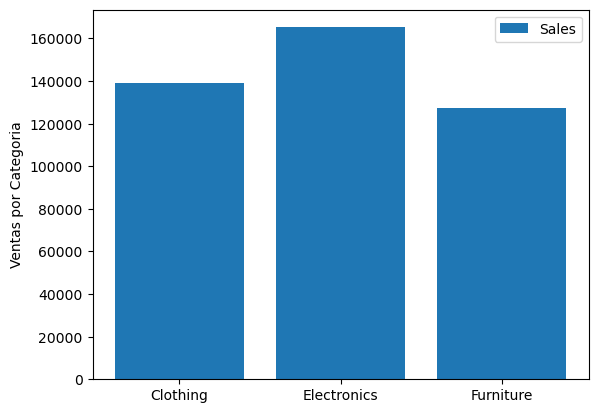

In [15]:
#Grafico de barras verticales

fig, ax = plt.subplots()

ax.bar(df_categoria.index, df_categoria['Amount'], label='Sales')
ax.legend()

ax.set_ylabel('Ventas por Categoria')

plt.show()

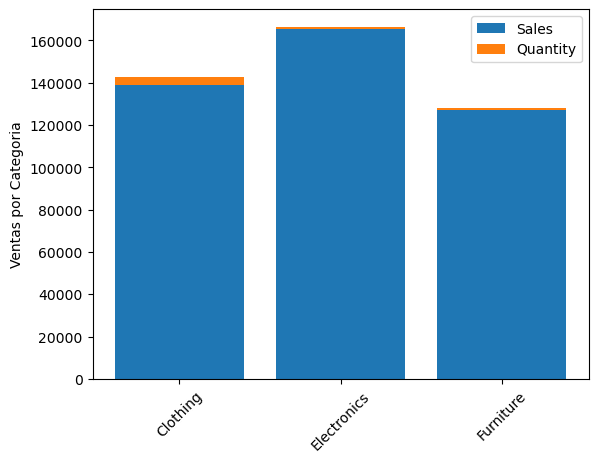

In [16]:
# Grafico de barras apiladas

fig, ax = plt.subplots()

ax.bar(df_categoria.index, df_categoria['Amount'], label='Sales')
ax.bar(df_categoria.index, df_categoria['Quantity'], 
      bottom = df_categoria['Amount'], label='Quantity')
ax.legend()
plt.xticks(rotation=45)
ax.set_ylabel('Ventas por Categoria')

fig.savefig('grafico_bar1.png', dpi=100)

plt.show()

C:\Users\ce02971\AppData\Local\Temp\ipykernel_7772\821618217.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_categoria.index, rotation= 45)


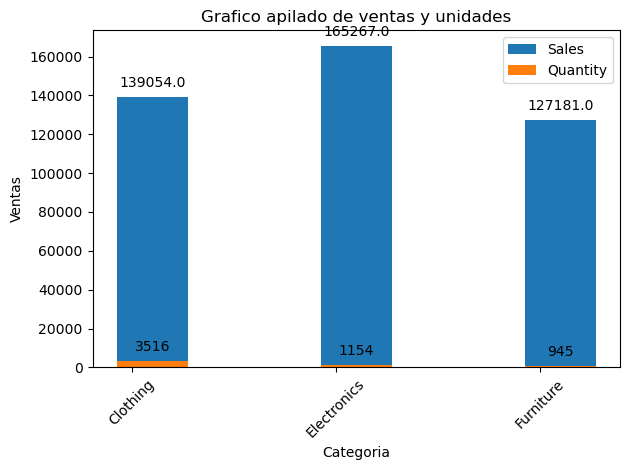

In [17]:
#Grafico de barras con anotaciones

width = 0.35

fig, ax = plt.subplots()

x = np.arange(len(df_categoria.index))

rects1= ax.bar(df_categoria.index, df_categoria['Amount'], width, label = 'Sales')
rects2= ax.bar(df_categoria.index, df_categoria['Quantity'], width, label = 'Quantity')

ax.set_title('Grafico apilado de ventas y unidades')
ax.set_xlabel('Categoria')
ax.set_ylabel('Ventas')
ax.legend()
ax.set_xticklabels(df_categoria.index, rotation= 45)
ax.set_xticks(x-0.1)

def autolabel(rects):
    """ Funcion para agregar una etiqueta con el valor de cada barra"""
    for rect in rects: 
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy= (rect.get_x() + rect.get_width()/2, height),
                   xytext=(0,5), 
                   textcoords = 'offset points',
                   ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

In [18]:
#Segmentacion de dataset

df_fecha = pd.DataFrame(df.groupby(['Order Date', 'Año'])[['Amount', 'Quantity']].sum()).reset_index()

per_19 = df_fecha[df_fecha['Año']==2019]
per_18 = df_fecha[df_fecha['Año']==2018]

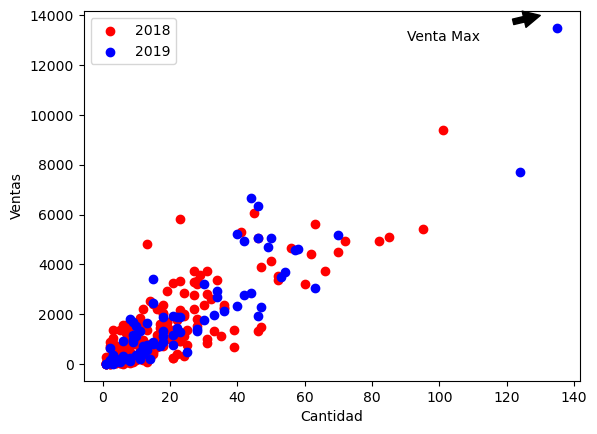

In [19]:
#Grafico de dispersion

fig, ax = plt.subplots()

ax.scatter(per_18['Quantity'], per_18['Amount'],
          color='r', label='2018')

ax.scatter(per_19['Quantity'], per_19['Amount'],
          color='b', label='2019')

ax.annotate('Venta Max', xy =(130, 14000), xycoords = 'data',
           xytext=(0.8, 0.95), textcoords='axes fraction',
           arrowprops=dict(facecolor= 'black', shrink =0.5), 
           horizontalalignment ='right', verticalalignment='top')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Ventas')
plt.legend()

plt.show()

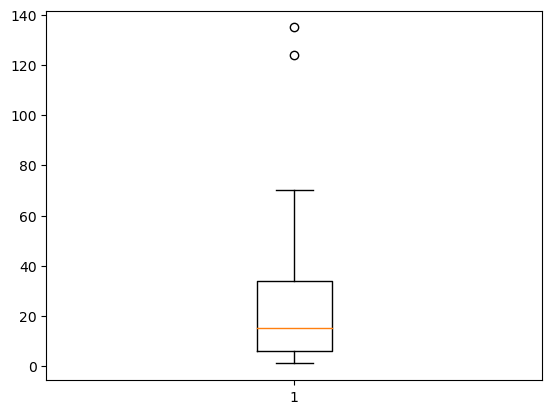

In [20]:
#Grafico de boxplot

plt.style.use('default')

fig, ax = plt.subplots()

ax.boxplot(per_19['Quantity'])
plt.show()


## Introduccion a seaborn

In [21]:
video_games = pd.read_csv(path+'\Video_Games.csv', sep=';', header = 0, index_col=False,
                                encoding='latin-1', engine='python')
pokemon = pd.read_csv(path+'\Pokemon.csv', sep=';', header = 0, index_col=False,
                                encoding='latin-1', engine='python')

In [22]:
video_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


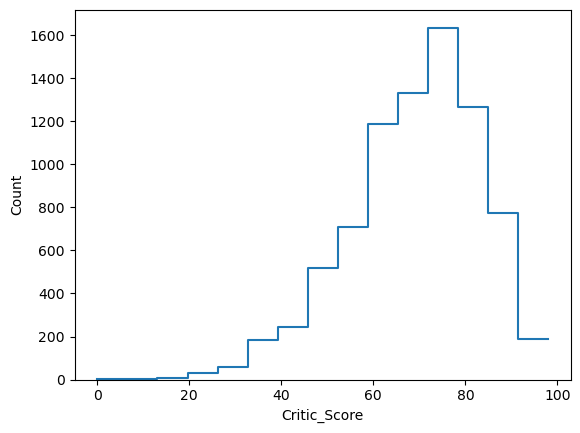

In [24]:
sns.histplot(video_games['Critic_Score'], kde = False, bins= 15, fill=False, element='step')

plt.show()

C:\Users\ce02971\AppData\Local\Temp\ipykernel_7772\2935193949.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(video_games['Critic_Score'])


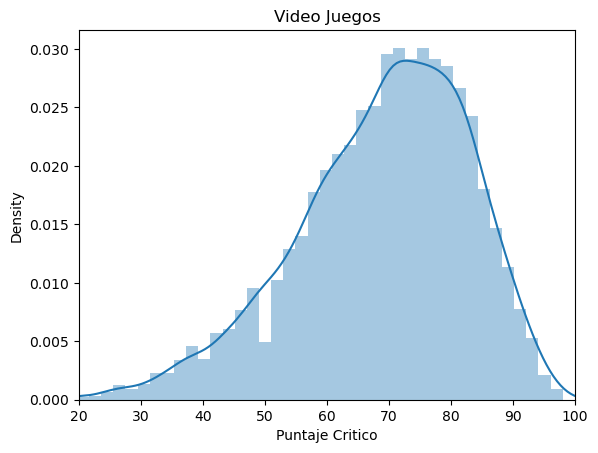

In [25]:
#grafico de densidad

fig, ax = plt.subplots()

sns.distplot(video_games['Critic_Score'])
ax.set(xlabel='Puntaje Critico',
      xlim=(20,100),
      title='Video Juegos')

plt.show()

C:\Users\ce02971\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


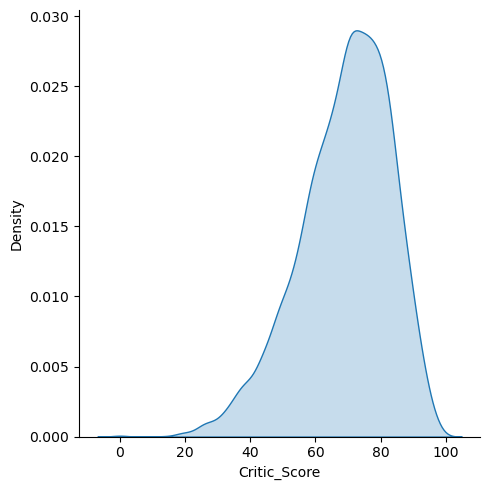

In [26]:
#Distplot 
sns.displot(data= video_games['Critic_Score'], kind = 'kde', fill= True)

plt.show()

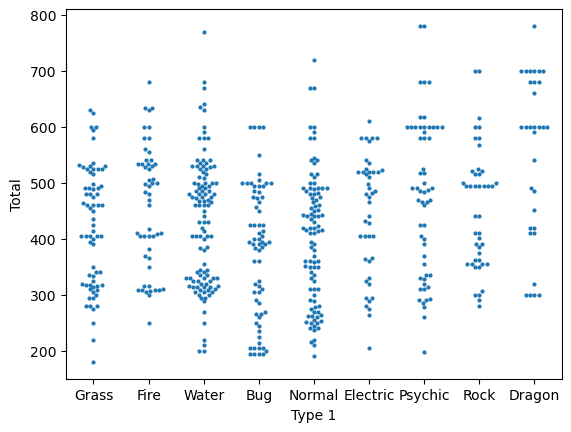

In [27]:
#Grafico de enjambre
sns.swarmplot(data= pokemon,
             x='Type 1',
             y='Total',
             s=3)

plt.show()

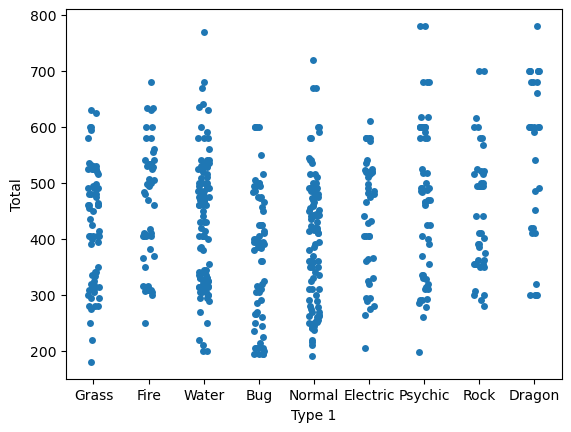

In [29]:
#Striplot

sns.stripplot(data = pokemon, 
             x= 'Type 1',
             y= 'Total',
             jitter = True)
plt.show()

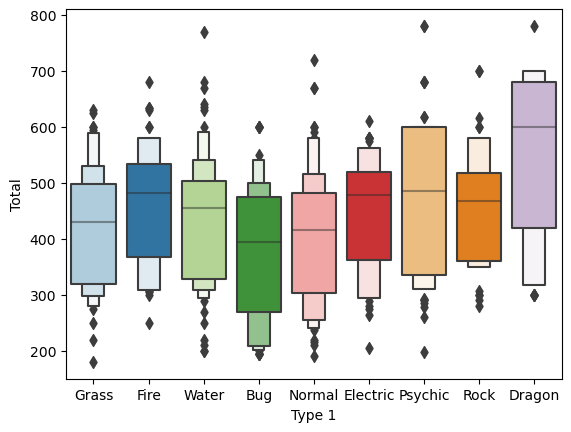

In [30]:
#Boxplot con seaborn

sns.boxenplot(data= pokemon,
             x= 'Type 1',
             y= 'Total',
             palette='Paired')
plt.show()

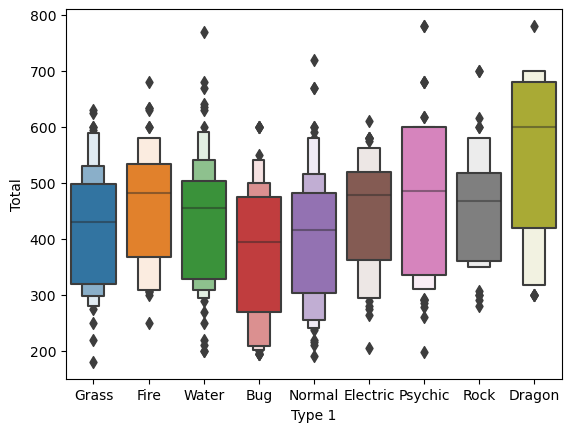

In [31]:
#boxplot

sns.boxenplot(data=pokemon,
             x= 'Type 1',
             y= 'Total')
plt.show()

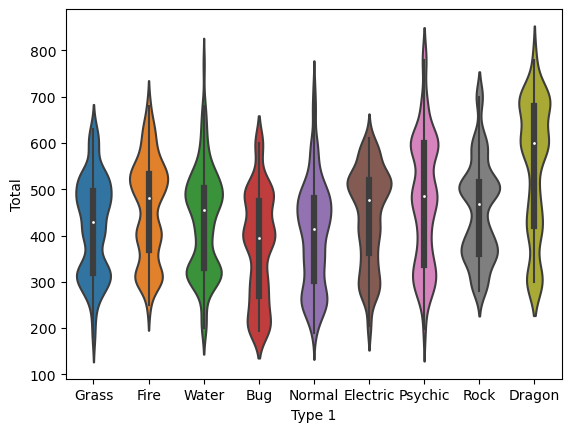

In [33]:
#Violinplot

sns.violinplot(data=pokemon, 
              x= 'Type 1', 
              y= 'Total',
              bw=0.25)

plt.show()